In [2]:
import math
import time
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def cut_value(graph, labels):
    total = 0.0
    for u, v, data in graph.edges(data=True):
        if labels[u] != labels[v]:
            total += data.get("weight", 1)
    return total

In [4]:
def initialize(graph, k) -> dict:
    return {node: random.randrange(k) for node in graph.nodes()}

In [5]:
def change_label(current_labels, graph, k):
    
    node = random.choice(list(graph.nodes()))
    current_label = current_labels[node]
    candidates = [g for g in range(k) if g != current_label]
    
    new_label = random.choice(candidates)
    new_labels = current_labels.copy()
    new_labels[node] = new_label
    return new_labels

In [6]:
def simulated_annealing_maxkcut(
    graph,
    k,
    initial_temperature: float = 1.0,
    cooling_rate: float = 0.995,
    stopping_temperature: float = 1e-4,
    max_iterations: int = 10000
):
    
    start = time.time()


    current_labels = initialize(graph, k)
    current_cut = cut_value(graph, current_labels)
    best_labels = current_labels
    best_cut = current_cut

    temp = initial_temperature
    

    for it in range(max_iterations):
        if temp < stopping_temperature:
            break

        neighbor_labels = change_label(current_labels, graph, k)
        neighbor_cut = cut_value(graph, neighbor_labels)
       
        delta = neighbor_cut - current_cut  
        
        if delta > 0 or random.random() < math.exp(delta / temp):
            current_labels = neighbor_labels
            current_cut = neighbor_cut

            if current_cut > best_cut:
                best_labels = current_labels
                best_cut = current_cut


        temp *= cooling_rate

    elapsed = time.time() - start
    return best_labels, best_cut,elapsed

In [7]:
def format_time(seconds):
    return "{:.10f}".format(seconds)

In [8]:
def appendToFile(filename, k, best_val, elapsed_time):
    podaci.append(filename + ".txt")
    podaci.append("k: " + str(k))
    podaci.append("Best cut value: " + str(best_val))
    podaci.append("Vreme: " + format_time(elapsed_time) + " sekundi")

    with open("../Rezultati/brute_force_maxkcut.txt", "a") as fajl:
        for podatak in podaci:
            fajl.write(f"{podatak}\n")

    podaci.clear()

In [9]:
def plot_graph(graph, colors):
   
    G = nx.Graph(graph)
    node_colors = []
    for node in G.nodes():
        try:
            node_colors.append(colors[node])
        except KeyError:
            print("Čvor", node, "nema dodeljenu grupu.")
            node_colors.append('gray')  # nedodeljeni čvorovi sivi

    nx.draw(G, with_labels=True,
            node_color=node_colors,
            cmap=plt.cm.rainbow,
            node_size=500)
    
    plt.show()

In [10]:
podaci=[] 
graph1 = {
        'A': ['B','C','D'],
        'B': ['A','C'],
        'C': ['A','B','D'],
        'D': ['A','C','E'],
        'E': ['D','F'],
        'F': ['E','G'],
        'G': ['F']
    }
G1 = nx.Graph(graph1)
for u, v in G1.edges():
    G1.edges[u, v]['weight'] = 1



=== PRIMER 1 ===
Najbolja vrednost preseka: 8.0
Podela čvorova: {'A': 2, 'B': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 2, 'G': 1}
Vreme: 0.0332298279 sekundi


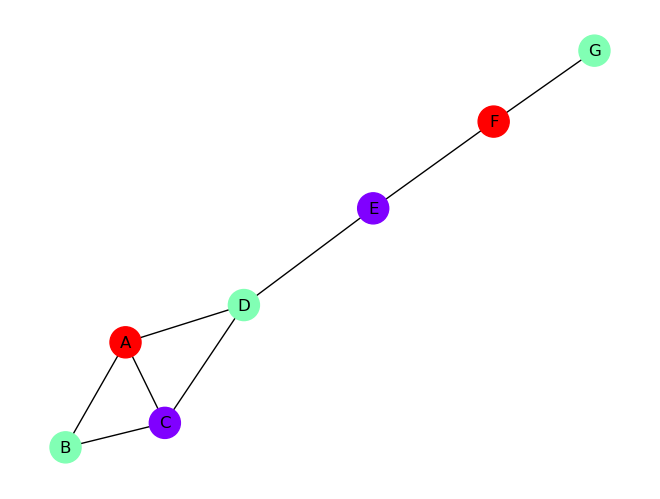

In [11]:
k=3
start_time = time.time()
labels, best_val,elapsed = simulated_annealing_maxkcut(G1, k)
end_time = time.time()

print("\n=== PRIMER 1 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G1, labels)


In [12]:
G2 = nx.Graph()
G2.add_edge('A','B', weight=3)
G2.add_edge('A','C', weight=2)
G2.add_edge('B','C', weight=5)
G2.add_edge('C','D', weight=4)
G2.add_edge('B','D', weight=1)
k=3


===  Primer 2 ===
Najbolja vrednost preseka: 15.0
Podela čvorova: {'A': 1, 'B': 2, 'C': 0, 'D': 1}
Vreme: 0.0328028202 sekundi


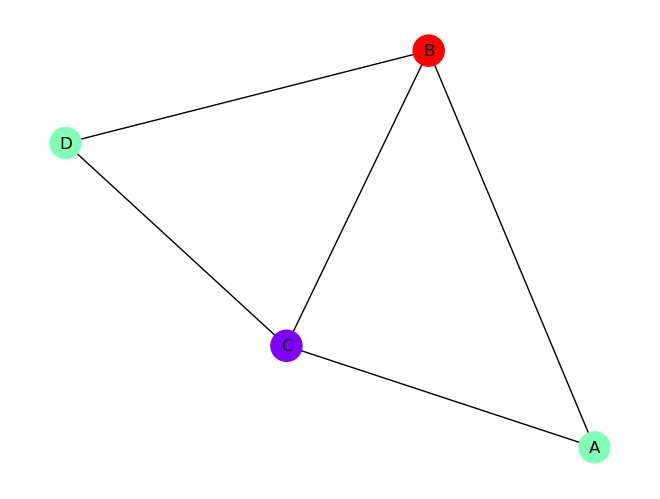

In [13]:
k = 3

start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G2, k)

end_time = time.time()

print("\n===  Primer 2 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G2, labels)


In [14]:
n = 30
filename = f"testiranje/graph_{n}.edgelist"
G3 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 3 ===
Najbolja vrednost preseka: 480.0
Podela čvorova: {0: 2, 3: 1, 14: 0, 15: 0, 22: 0, 23: 1, 1: 0, 9: 2, 17: 0, 4: 0, 6: 2, 12: 1, 20: 2, 26: 2, 29: 2, 16: 0, 27: 2, 28: 2, 5: 1, 19: 0, 24: 1, 25: 1, 11: 0, 13: 1, 18: 1, 7: 2, 8: 2, 21: 2, 10: 1}
Vreme: 0.1103544235 sekundi


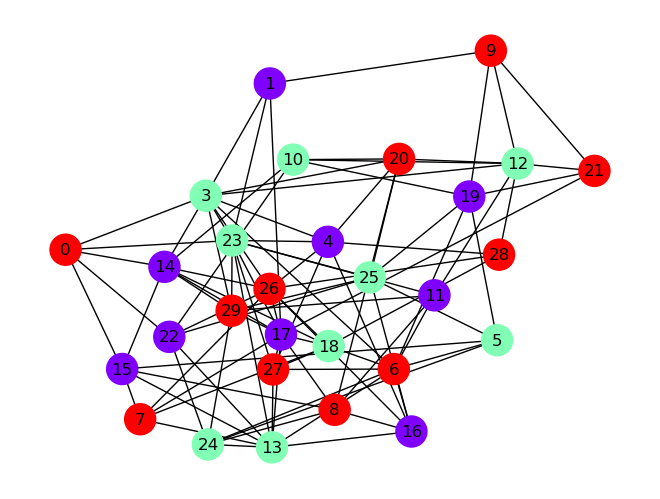

In [15]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G3, k)

end_time = time.time()

print("\n===  Primer 3 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")


plot_graph(G3, labels)


In [16]:
n = 50  
filename = f"testiranje/graph_{n}.edgelist"
G4 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 4 ===
Najbolja vrednost preseka: 1123.0
Podela čvorova: {0: 2, 7: 0, 10: 1, 11: 0, 15: 0, 32: 0, 1: 0, 3: 2, 6: 0, 9: 1, 19: 1, 20: 1, 23: 1, 26: 1, 37: 1, 40: 1, 49: 1, 2: 0, 4: 2, 5: 1, 16: 2, 21: 1, 30: 2, 31: 0, 36: 1, 38: 2, 8: 1, 22: 1, 25: 0, 35: 0, 39: 1, 47: 1, 41: 0, 12: 2, 46: 2, 14: 2, 17: 1, 28: 2, 29: 0, 42: 1, 34: 2, 44: 1, 48: 0, 13: 2, 24: 0, 27: 0, 33: 2, 18: 2, 45: 0, 43: 1}
Vreme: 0.1901044846 sekundi


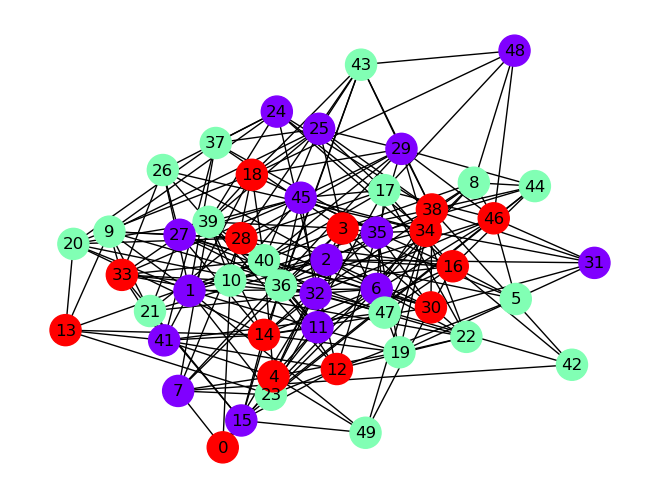

In [17]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G4, k)

end_time = time.time()

print("\n===  Primer 4 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G4, labels)

In [18]:
n = 100  
filename = f"testiranje/graph_{n}.edgelist"
G5 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 5 ===
Najbolja vrednost preseka: 4414.0
Podela čvorova: {0: 2, 1: 1, 9: 1, 11: 1, 18: 2, 19: 0, 28: 0, 30: 1, 31: 1, 35: 1, 42: 1, 68: 1, 71: 1, 74: 0, 75: 2, 84: 0, 85: 0, 86: 2, 99: 2, 4: 0, 5: 1, 7: 2, 8: 2, 10: 2, 21: 2, 40: 1, 41: 0, 51: 2, 53: 1, 57: 0, 59: 2, 63: 2, 67: 0, 73: 0, 76: 2, 88: 0, 89: 2, 90: 2, 91: 2, 93: 0, 96: 2, 2: 1, 22: 0, 24: 2, 32: 0, 37: 0, 44: 2, 50: 0, 64: 0, 66: 0, 69: 0, 72: 2, 77: 0, 87: 2, 97: 2, 3: 0, 23: 0, 25: 2, 26: 1, 45: 2, 60: 1, 83: 2, 14: 0, 29: 1, 34: 1, 62: 0, 95: 2, 33: 1, 36: 1, 49: 2, 52: 1, 56: 2, 82: 0, 92: 0, 6: 0, 54: 1, 70: 1, 79: 0, 15: 2, 39: 1, 58: 0, 61: 0, 38: 1, 46: 0, 65: 2, 78: 0, 16: 1, 81: 0, 17: 1, 27: 1, 94: 1, 55: 2, 12: 0, 13: 2, 43: 2, 47: 0, 80: 0, 20: 1, 98: 1, 48: 2}
Vreme: 0.6824226379 sekundi


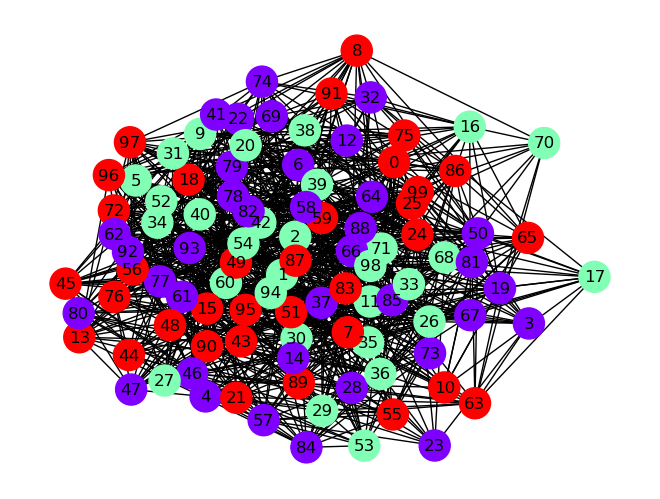

In [19]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G5, k)

end_time = time.time()

print("\n===  Primer 5 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G5, labels)

In [20]:
n = 200  
filename = f"testiranje/graph_{n}.edgelist"
G6 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 6 ===
Najbolja vrednost preseka: 17338.0
Podela čvorova: {0: 1, 1: 2, 4: 0, 7: 2, 9: 1, 10: 2, 13: 0, 18: 0, 23: 0, 24: 2, 25: 2, 30: 2, 35: 2, 47: 0, 57: 2, 61: 0, 63: 0, 69: 2, 70: 2, 77: 2, 80: 2, 84: 2, 85: 1, 89: 0, 90: 1, 91: 2, 92: 1, 95: 0, 100: 2, 102: 1, 105: 2, 106: 2, 109: 0, 111: 2, 113: 2, 114: 1, 126: 2, 129: 2, 135: 1, 136: 0, 140: 2, 141: 2, 144: 1, 148: 1, 151: 0, 158: 2, 161: 2, 173: 2, 180: 0, 181: 2, 188: 0, 27: 1, 28: 1, 31: 2, 34: 1, 37: 2, 38: 1, 39: 0, 54: 2, 55: 0, 64: 0, 66: 0, 67: 1, 72: 2, 75: 0, 79: 2, 96: 1, 99: 1, 103: 0, 107: 1, 115: 2, 118: 1, 128: 1, 132: 0, 143: 1, 147: 0, 162: 1, 166: 0, 169: 1, 172: 1, 176: 2, 177: 0, 182: 1, 183: 1, 184: 1, 194: 0, 195: 0, 199: 2, 2: 2, 16: 0, 17: 1, 20: 0, 40: 0, 44: 1, 53: 1, 76: 0, 82: 1, 97: 1, 98: 2, 108: 1, 119: 0, 131: 1, 145: 1, 150: 1, 152: 0, 153: 2, 159: 2, 163: 2, 178: 0, 187: 1, 3: 1, 19: 0, 21: 0, 32: 2, 36: 1, 58: 0, 68: 0, 94: 2, 122: 0, 123: 0, 125: 0, 149: 0, 155: 2, 164: 2, 170: 1, 

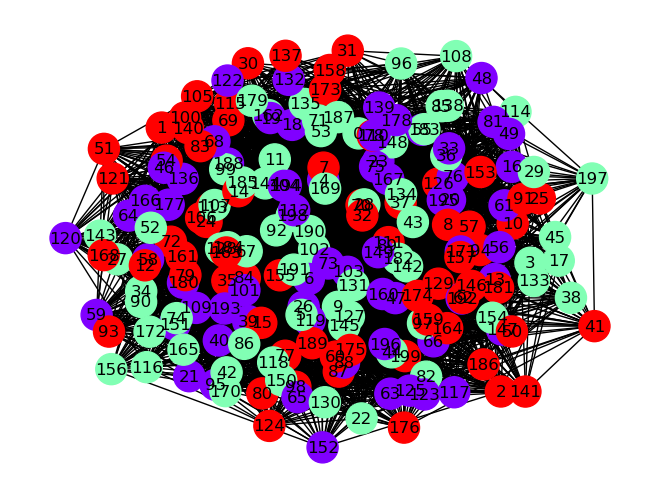

In [37]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G6, k)

end_time = time.time()

print("\n===  Primer 6 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G6, labels)

In [24]:
n = 250  
filename = f"testiranje/graph_{n}.edgelist"
G7 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 7 ===
Najbolja vrednost preseka: 26058.0
Podela čvorova: {0: 2, 4: 0, 5: 0, 7: 1, 16: 0, 19: 0, 51: 1, 58: 0, 59: 2, 60: 1, 64: 1, 65: 1, 67: 2, 70: 1, 75: 0, 77: 2, 83: 0, 85: 2, 89: 0, 94: 0, 95: 2, 110: 2, 111: 1, 116: 0, 119: 1, 121: 1, 125: 0, 126: 1, 132: 0, 134: 0, 138: 0, 141: 2, 146: 1, 149: 2, 150: 0, 158: 0, 159: 2, 167: 2, 171: 0, 178: 2, 181: 0, 183: 1, 185: 2, 186: 1, 190: 1, 191: 1, 192: 2, 195: 2, 199: 1, 214: 1, 218: 2, 221: 1, 235: 1, 238: 2, 240: 1, 243: 1, 248: 0, 1: 2, 10: 2, 12: 1, 13: 0, 31: 1, 34: 2, 40: 0, 48: 2, 52: 2, 57: 1, 61: 0, 68: 2, 71: 2, 72: 1, 84: 1, 87: 1, 97: 0, 107: 0, 108: 0, 118: 1, 122: 2, 133: 0, 142: 0, 148: 1, 153: 0, 164: 2, 173: 0, 180: 1, 188: 2, 194: 2, 201: 0, 202: 2, 206: 1, 220: 1, 228: 0, 241: 2, 249: 0, 2: 1, 22: 0, 25: 1, 37: 2, 39: 2, 43: 1, 44: 0, 45: 0, 54: 2, 63: 0, 66: 2, 74: 2, 76: 0, 80: 2, 88: 1, 93: 1, 101: 2, 112: 2, 113: 2, 114: 2, 127: 2, 128: 1, 145: 1, 152: 1, 155: 2, 163: 2, 176: 1, 177: 0, 189: 0, 196: 

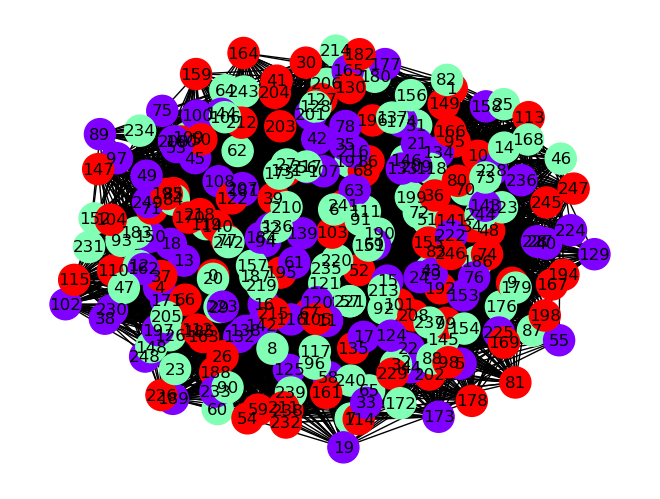

In [25]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G7, k)

end_time = time.time()

print("\n===  Primer 7 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G7, labels)

In [26]:
n = 350  
filename = f"testiranje/graph_{n}.edgelist"
G8 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 8 ===
Najbolja vrednost preseka: 50540.0
Podela čvorova: {0: 2, 8: 0, 27: 1, 35: 0, 36: 0, 39: 1, 44: 2, 53: 2, 56: 2, 64: 0, 65: 2, 73: 0, 76: 2, 84: 1, 86: 2, 87: 2, 91: 2, 94: 2, 95: 1, 97: 1, 105: 0, 107: 1, 112: 1, 114: 1, 116: 1, 125: 1, 127: 1, 130: 0, 139: 1, 142: 2, 149: 1, 150: 2, 165: 1, 186: 0, 194: 0, 203: 0, 209: 1, 218: 2, 222: 1, 223: 2, 224: 0, 239: 2, 244: 0, 245: 1, 248: 1, 250: 2, 258: 2, 259: 2, 273: 0, 279: 0, 282: 0, 290: 1, 291: 0, 292: 2, 297: 0, 306: 2, 308: 0, 310: 1, 312: 0, 322: 1, 323: 1, 333: 0, 344: 0, 348: 0, 1: 2, 18: 0, 20: 2, 24: 1, 38: 0, 50: 0, 52: 2, 75: 0, 79: 1, 80: 1, 83: 1, 85: 1, 110: 0, 113: 1, 124: 0, 135: 1, 137: 1, 143: 0, 153: 2, 154: 0, 160: 1, 162: 1, 169: 1, 171: 0, 175: 2, 176: 0, 183: 2, 185: 0, 187: 1, 188: 2, 191: 1, 196: 2, 199: 0, 202: 1, 204: 2, 213: 2, 220: 0, 221: 1, 227: 0, 232: 0, 241: 1, 242: 2, 247: 1, 249: 2, 260: 0, 265: 2, 268: 2, 272: 1, 274: 1, 276: 1, 277: 1, 280: 2, 285: 0, 303: 0, 304: 1, 319: 1, 321:

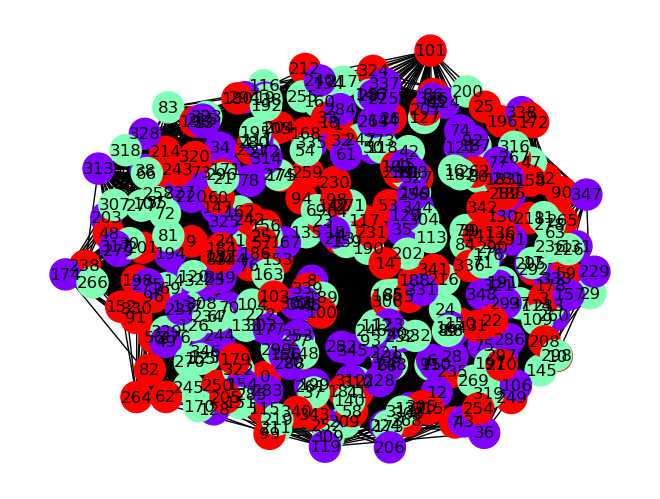

In [27]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G8, k)

end_time = time.time()

print("\n===  Primer 8 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G8, labels)

In [28]:
n = 450  
filename = f"testiranje/graph_{n}.edgelist"
G9 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 9===
Najbolja vrednost preseka: 81985.0
Podela čvorova: {0: 0, 1: 1, 4: 1, 13: 0, 18: 2, 20: 1, 26: 0, 28: 2, 29: 0, 36: 0, 44: 2, 57: 1, 58: 0, 61: 2, 68: 0, 75: 0, 76: 1, 83: 1, 103: 2, 104: 1, 114: 2, 118: 2, 121: 1, 139: 0, 143: 0, 148: 0, 154: 2, 156: 1, 158: 1, 168: 0, 171: 2, 191: 0, 193: 0, 204: 2, 206: 2, 207: 1, 210: 0, 212: 0, 214: 2, 218: 1, 221: 0, 239: 1, 240: 1, 261: 2, 265: 0, 269: 2, 276: 0, 282: 1, 283: 0, 284: 1, 295: 1, 304: 1, 311: 0, 315: 1, 318: 0, 320: 2, 329: 1, 331: 0, 335: 2, 339: 0, 356: 1, 357: 1, 358: 1, 368: 0, 370: 0, 373: 2, 384: 2, 385: 1, 389: 2, 391: 2, 393: 0, 394: 2, 401: 0, 403: 1, 405: 1, 406: 1, 407: 2, 408: 2, 410: 2, 416: 2, 424: 2, 427: 0, 437: 1, 439: 0, 2: 2, 5: 0, 19: 1, 27: 2, 32: 2, 38: 1, 39: 2, 41: 1, 51: 0, 74: 2, 78: 1, 80: 1, 82: 1, 85: 0, 91: 2, 93: 0, 100: 2, 105: 1, 119: 0, 124: 2, 125: 0, 138: 0, 140: 1, 150: 0, 160: 0, 162: 2, 165: 2, 169: 0, 173: 1, 196: 0, 208: 0, 209: 1, 213: 0, 216: 2, 222: 2, 230: 2, 234: 2, 2

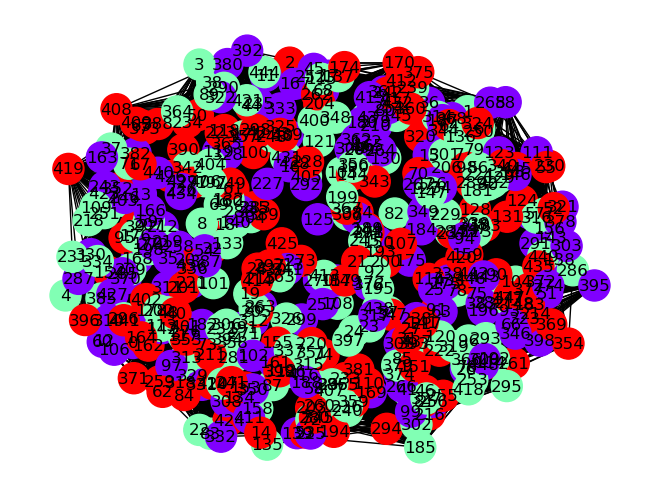

In [29]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G9, k)

end_time = time.time()

print("\n===  Primer 9===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G9, labels)

In [30]:
n = 550  
filename = f"testiranje/graph_{n}.edgelist"
G10 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 10 ===
Najbolja vrednost preseka: 121064.0
Podela čvorova: {0: 2, 4: 1, 8: 2, 9: 0, 10: 0, 13: 1, 18: 1, 26: 2, 28: 1, 35: 2, 36: 1, 47: 0, 48: 0, 50: 2, 53: 1, 59: 2, 62: 2, 65: 0, 71: 0, 76: 2, 86: 1, 87: 1, 88: 0, 93: 0, 95: 1, 96: 1, 101: 0, 105: 1, 109: 2, 119: 0, 122: 2, 136: 2, 143: 1, 149: 1, 150: 2, 161: 2, 168: 0, 176: 0, 177: 2, 178: 0, 179: 2, 185: 2, 189: 1, 191: 2, 204: 0, 205: 0, 214: 2, 216: 1, 217: 0, 222: 2, 225: 0, 231: 0, 239: 0, 240: 1, 241: 1, 244: 2, 245: 1, 248: 1, 262: 0, 265: 1, 272: 1, 276: 1, 283: 0, 290: 0, 294: 2, 296: 0, 299: 0, 300: 1, 325: 1, 326: 1, 328: 2, 330: 1, 342: 0, 344: 1, 348: 0, 350: 0, 351: 0, 354: 2, 365: 2, 368: 1, 371: 2, 378: 1, 392: 2, 397: 0, 400: 2, 403: 1, 408: 2, 415: 0, 416: 2, 418: 0, 421: 2, 425: 2, 430: 0, 432: 0, 445: 2, 450: 0, 451: 0, 452: 0, 453: 0, 459: 2, 463: 0, 464: 1, 477: 2, 479: 1, 485: 2, 490: 0, 493: 0, 495: 1, 498: 1, 505: 0, 508: 1, 510: 0, 514: 1, 515: 1, 519: 1, 529: 1, 532: 2, 538: 2, 539: 2, 540: 

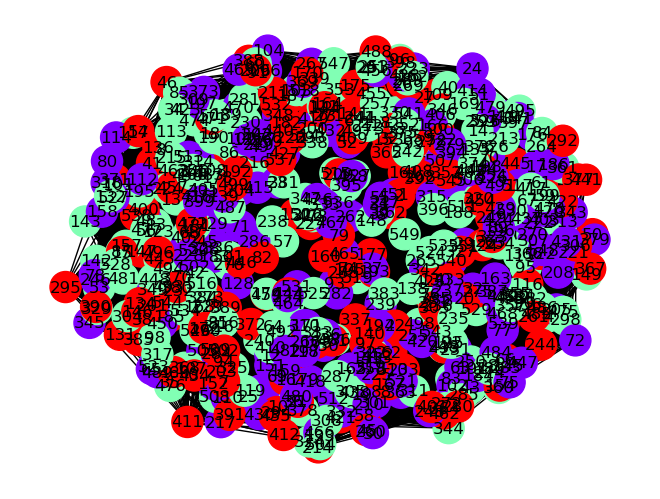

In [31]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G10, k)

end_time = time.time()

print("\n===  Primer 10 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G10, labels)

In [32]:
n = 1000  
filename = f"testiranje/graph_{n}.edgelist"
G11 = nx.read_weighted_edgelist(filename, nodetype=int)


===  Primer 11 ===
Najbolja vrednost preseka: 388572.0
Podela čvorova: {0: 2, 3: 1, 8: 1, 16: 1, 23: 0, 29: 2, 31: 0, 32: 2, 33: 0, 35: 1, 40: 1, 54: 1, 55: 0, 57: 0, 83: 1, 91: 0, 96: 1, 97: 2, 103: 2, 107: 0, 114: 2, 123: 0, 125: 2, 131: 2, 142: 2, 146: 0, 149: 0, 155: 0, 158: 2, 164: 1, 172: 1, 176: 0, 181: 0, 195: 2, 208: 1, 214: 0, 217: 1, 226: 1, 230: 1, 235: 0, 247: 2, 251: 1, 254: 2, 257: 0, 263: 1, 268: 1, 271: 1, 286: 0, 287: 1, 297: 0, 298: 0, 326: 2, 336: 2, 338: 0, 344: 1, 348: 0, 349: 2, 353: 2, 354: 1, 357: 0, 359: 1, 363: 0, 366: 1, 368: 1, 370: 0, 372: 0, 379: 0, 381: 1, 387: 2, 390: 0, 393: 1, 396: 1, 404: 1, 405: 2, 411: 1, 417: 2, 423: 0, 424: 0, 426: 2, 428: 0, 432: 2, 433: 0, 441: 1, 442: 0, 450: 0, 451: 2, 463: 0, 468: 2, 477: 0, 478: 2, 480: 0, 487: 0, 495: 1, 505: 0, 509: 0, 512: 1, 513: 0, 527: 0, 530: 2, 537: 1, 547: 0, 548: 1, 549: 0, 551: 1, 560: 2, 572: 2, 576: 1, 581: 2, 586: 0, 587: 1, 600: 2, 603: 1, 607: 0, 614: 0, 620: 0, 629: 0, 633: 1, 637: 0, 641:

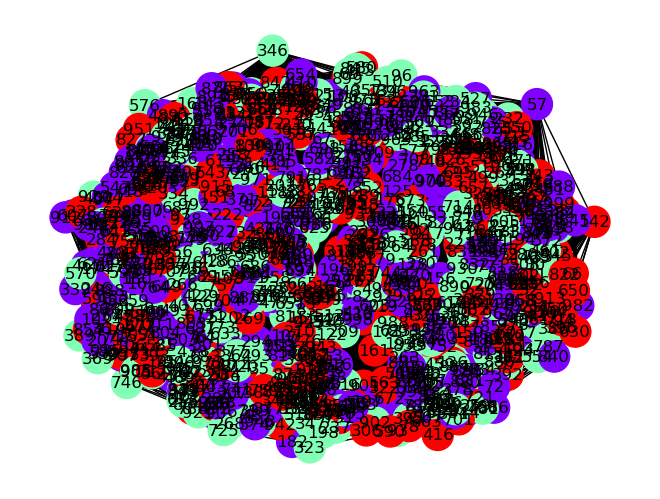

In [33]:
start_time = time.time()

labels, best_val, elapsed = simulated_annealing_maxkcut(G11, k)

end_time = time.time()

print("\n===  Primer 11 ===")
print("Najbolja vrednost preseka:", best_val)
print("Podela čvorova:", labels)
print("Vreme:", format_time(elapsed), "sekundi")

plot_graph(G11, labels)

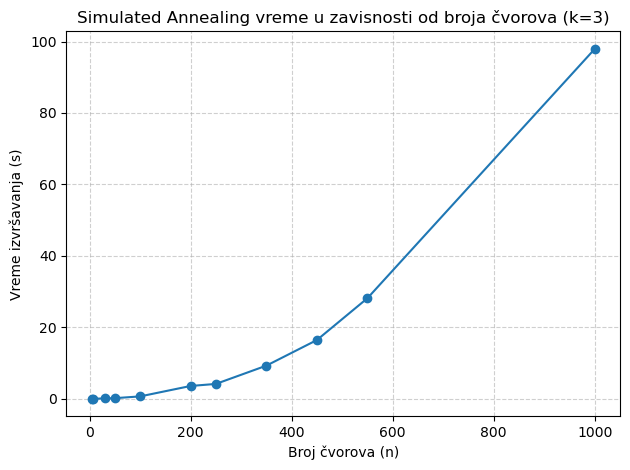

In [38]:
n_values = [4, 7,30,50,100,200,250,350,450,550,1000]
times = [0.0328,0.0332,0.1104,0.1901,0.6824,3.6023,4.1755,9.2947,16.4635,28.1687,97.9570]  

plt.plot(n_values, times, marker='o')
plt.xlabel("Broj čvorova (n)")
plt.ylabel("Vreme izvršavanja (s)")
plt.title("Simulated Annealing vreme u zavisnosti od broja čvorova (k=3)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [39]:
df = pd.DataFrame({
    "Broj čvorova (n)": n_values,
    "Vreme izvršavanja (s)": times
})
df

,Broj čvorova (n),Vreme izvršavanja (s)
0,4,0.0328
1,7,0.0332
2,30,0.1104
3,50,0.1901
4,100,0.6824
5,200,3.6023
6,250,4.1755
7,350,9.2947
8,450,16.4635
9,550,28.1687
